Import packages
===

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

Load Data
---

In [2]:
file = 'chirps_full_WA.nc'
data = xr.open_dataset(file)
data = data['precip'].where(data['precip']!=-99)

In [3]:
# data

Create Julian Day (Day of Year) Groupings
===

In [4]:
doy_data = data.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_data

DataArrayGroupBy, grouped over 'dayofyear'
366 groups with labels 1, 2, 3, 4, 5, ..., 363, 364, 365, 366.

In [5]:
# doy_data[365]

### Function for Anomaly Computation & Data Check for inf values

In [6]:
def ano(x,dim):
    return (x-x.mean(dim=dim))

def inf_check(p, grid=True):
    if grid==True:
        p = p.where(p!=np.inf).where(p!=-np.inf)
    else:
        p[np.isinf(p)==True] = np.nan
    return p

Visualisation
===

In [7]:
# list(yearly_data.groups.copy())

In [8]:
# doy_data.mean().dayofyear[0]

In [9]:
inf_check(doy_data.mean(),grid=True)

<xarray.DataArray 'precip' (dayofyear: 366)>
array([0.07778258, 0.08583616, 0.05115154, 0.04753082, 0.08443453,
       0.06027576, 0.07971965, 0.09013351, 0.10306961, 0.11560995,
       0.08630644, 0.05633972, 0.06226293, 0.06636761, 0.07963407,
       0.07113823, 0.04781706, 0.0711197 , 0.07370456, 0.10585141,
       0.16177143, 0.10802011, 0.10230204, 0.08965687, 0.07784171,
       0.1296538 , 0.13160302, 0.16543294, 0.11324219, 0.14755847,
       0.18946575, 0.16475517, 0.20154376, 0.18348299, 0.15271932,
       0.16132697, 0.15666269, 0.1727473 , 0.23673368, 0.24104924,
       0.2524216 , 0.36741412, 0.304485  , 0.30297717, 0.32019138,
       0.35348892, 0.25275156, 0.3050037 , 0.36502555, 0.30470452,
       0.30100593, 0.34678152, 0.3808014 , 0.33688337, 0.34893122,
       0.42733186, 0.35992974, 0.3043693 , 0.38941145, 0.54520166,
       0.52349323, 0.5200608 , 0.528786  , 0.43629792, 0.5707197 ,
       0.54833627, 0.5802147 , 0.7431547 , 0.7192982 , 0.6863384 ,
       0.6290735 , 0.75444233, 0.7303553 , 0.8259923 , 0.7458107 ,
       0.62566084, 0.6869598 , 0.7231439 , 0.6896853 , 0.78816575,
       0.8613283 , 0.7271964 , 0.6603685 , 0.70779634, 0.8828622 ,
       0.76603436, 0.85227674, 0.7253772 , 0.8550481 , 0.96892893,
       0.99221987, 1.1664422 , 1.122246  , 0.9473639 , 0.98593503,
       1.162416  , 1.2490213 , 1.0356777 , 0.9575675 , 1.0137533 ,
...
       2.97789   , 2.7524152 , 3.2935295 , 2.429853  , 2.2161698 ,
       2.2344923 , 2.2200217 , 2.1790738 , 1.900413  , 2.05438   ,
       2.2046165 , 1.9909203 , 2.1808753 , 1.9816475 , 2.112708  ,
       1.7402027 , 1.8476728 , 1.6926818 , 1.6865345 , 1.7063832 ,
       2.061204  , 2.0650945 , 1.7475439 , 1.6125178 , 1.6710409 ,
       1.7972621 , 1.729786  , 1.5493413 , 1.4852592 , 1.5740564 ,
       1.5239048 , 1.7342827 , 1.455578  , 1.453773  , 0.96972966,
       0.73578554, 0.6656449 , 0.6577119 , 0.73081344, 0.56646836,
       0.5172948 , 0.48684505, 0.5642609 , 0.5622523 , 0.49999937,
       0.4725115 , 0.45425338, 0.4377245 , 0.3512117 , 0.4184236 ,
       0.36858046, 0.4381457 , 0.4217404 , 0.39355868, 0.48770988,
       0.4616061 , 0.35841233, 0.36127964, 0.40640414, 0.43773496,
       0.45581093, 0.3161357 , 0.24066831, 0.20224047, 0.26273936,
       0.2886287 , 0.31734583, 0.27974164, 0.24499534, 0.22890592,
       0.1841709 , 0.17607735, 0.17065285, 0.15437868, 0.18443352,
       0.19592838, 0.21576135, 0.18313137, 0.17618965, 0.11333174,
       0.10841625, 0.06886888, 0.11468046, 0.12114636, 0.17826341,
       0.13838413, 0.09805163, 0.07812095, 0.12089439, 0.15434578,
       0.06353455, 0.11329848, 0.08172281, 0.08613954, 0.09803502,
       0.11292637], dtype=float32)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

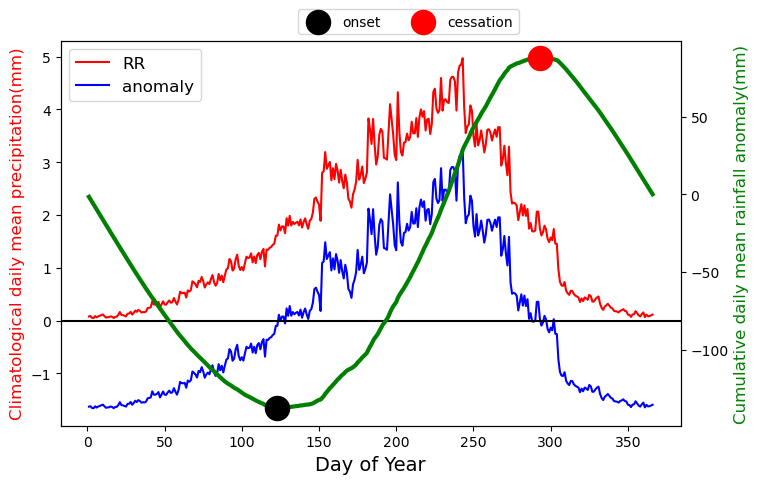

In [10]:
x = list(doy_data.groups.copy())
fig, ax = plt.subplots(figsize=(8,5))

avg_data = inf_check(doy_data.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

ax.set_xlabel('Day of Year', fontsize=14)


ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


ax1 = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe
            

#Onset and Cessation Detection                 
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    
            
ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))      
fig.savefig('West_Africa')
                

In [11]:
cessation[0]

[293, 87.47252]

Checking how it will look like as a subplot
===

In [12]:
# x = list(doy_data.groups.copy())
# fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(15,20))

# ax=axes[0]
# avg_data = inf_check(doy_data.mean(),grid=True)
# avg_data.plot(ax = ax,color='r',label='RR')
# ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# # legend
# ax.legend(loc='upper left', fontsize=12)
# ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

# ax.set_xlabel('Day of Year', fontsize=14)


# ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


# ax1 = ax.twinx()
# anom = ano(avg_data, dim='dayofyear').cumsum()
# ax1.plot(x, anom, color='g', linewidth=3)
# ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe


# #Onset and Cessation Detection                 
# anomaly = anom.values
# dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
# onset = []; cessation=[]
# for i in range(dx,len(anomaly)-dx):
#     if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
#         onset.append([i+1,anomaly[i+1]])
#     if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
#        cessation.append([i+1, anomaly[i+1]])    

# ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
# ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
# ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))      

# # axes[0].plot(x,avg_data, color='r',label='RR')
# # axes[0].plot(x, anom)
# plt.show
# plt.tight_layout()

In [13]:
# onset

In [14]:
# cessation

Determining onset and cessation on a yearly basis
===

In [15]:
yearly_data = data.mean(['longitude','latitude']).groupby('time.year')
yearly_data

DataArrayGroupBy, grouped over 'year'
30 groups with labels 1991, 1992, 1993, ..., 2019, 2020.

In [16]:
# yearly_data[1993]

Generating the plot for only 1993
===

In [17]:
# This is for 1993
yearly_data93 = yearly_data[1993]

# yearly_data93

In [18]:
doy_data93 = yearly_data93.groupby('time.dayofyear')
# doy_data93[290]

Text(0.5, 1.0, '1993/West Africa(CHIRPS)')

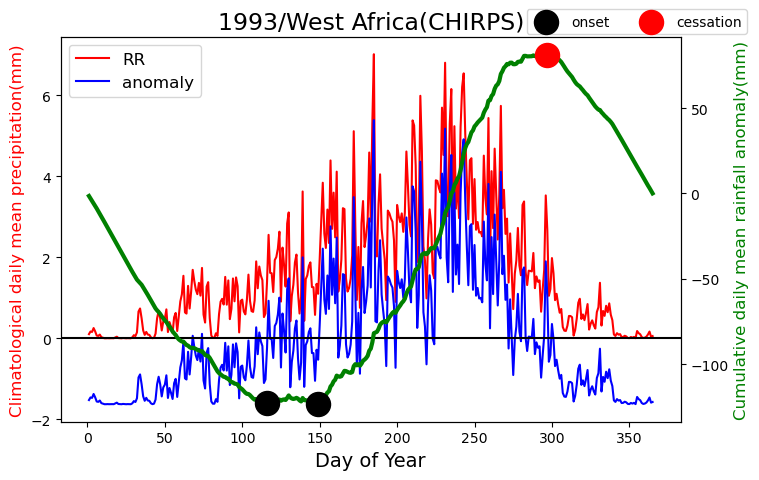

In [29]:
x = list(doy_data93.groups.copy())   #This is the Julian calender 
fig, ax = plt.subplots(figsize=(8,5))

avg_data = inf_check(doy_data93.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

ax.set_xlabel('Day of Year', fontsize=14)


ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


ax1 = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe
            

#Onset and Cessation Detection                 
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    
            
ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=2, ncol=2, bbox_to_anchor=(0.74, 1.09)) 
ax.set_title('1993/West Africa(CHIRPS)', fontsize=17)


Generating The Subplot for Each Year in 30 Years
===

In [20]:
for y, ax in zip(yearly_data,axes.flatten()):
    print(y)

NameError: name 'axes' is not defined

In [ ]:
count = 0
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12, 8))
fig.suptitle('Onset and Cessation for Each Year', fontsize=20)
fig.text(0, 0.5, 'Climatological daily mean precipitation (mm)', va='center', rotation='vertical', fontsize=20, color='r')
fig.text(1, 0.5, 'Cumulative daily mean rainfall anomaly (mm)', va='center', rotation='vertical', fontsize=20, color='g')
fig.text(0.5, 0.04, 'Day of Year', ha='center', fontsize=20)
plt.subplots_adjust(wspace=0.5, hspace=1)

for y, ax in zip(yearly_data,axes.flatten()):
#     if count < len(axes):
#     ax = axes[count // 5, count % 5]  # Access the appropriate subplot based on count

   
    year = y[0]  # Extract the year from the data
    y1 = y[1].groupby('time.dayofyear').sum('time')
    x = y1.dayofyear
    #x = list(doy_data91.groups.copy())

    avg_data = inf_check(y1, grid=True)
    avg_data.plot(ax=ax, color='r', label='RR')
    ano(avg_data, dim="dayofyear").plot(ax=ax, color='b', label='anomaly')

    # Legend
    ax.legend(loc='upper left', fontsize=12)
#     ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12)
    ax.set_xlabel('Day of Year', fontsize=14)
    ax.axhline(y=0, color='k')  # Horizontal black line at the zero mark

    ax1 = ax.twinx()
    anom = ano(avg_data, dim='dayofyear').cumsum()
    ax1.plot(x, anom, color='g', linewidth=3)
#     ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')  # Set label

    # Onset and Cessation Detection
    anomaly = anom.values
    dx = 28  # Detection window (we use a nearly monthly interval to avoid multiple mid-month false onset)
    onset = []
    cessation = []
    for i in range(dx, len(anomaly) - dx):
        if np.min(anomaly[i - dx:i + dx]) == anomaly[i]:
            onset.append([i + 1, anomaly[i + 1]])
        if np.max(anomaly[i - dx:i + dx]) == anomaly[i]:
            cessation.append([i + 1, anomaly[i + 1]])

    ax1.scatter(np.copy(onset).T[0], np.copy(onset).T[1], 300, color='k', zorder=5)
    ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5) #label='cessation')
    ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
    
    ax.set_title(str(year))  # Set the subplot title as the year
    count += 1
# filterwarnings('ignore')    
    
plt.show
fig.savefig('West_Africa_yearly')